<a href="https://colab.research.google.com/github/digs1998/Medhacks-Challenge/blob/main/Posture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Downloading the model
!wget --no-check-certificate -O /content/model.h5 https://github.com/abhieshekumar/posture-recognition/blob/master/ScratchModel/model/model.h5?raw=true

--2021-09-12 06:12:13--  https://github.com/abhieshekumar/posture-recognition/blob/master/ScratchModel/model/model.h5?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/abhieshekumar/posture-recognition/raw/master/ScratchModel/model/model.h5 [following]
--2021-09-12 06:12:13--  https://github.com/abhieshekumar/posture-recognition/raw/master/ScratchModel/model/model.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/abhieshekumar/posture-recognition/master/ScratchModel/model/model.h5 [following]
--2021-09-12 06:12:13--  https://raw.githubusercontent.com/abhieshekumar/posture-recognition/master/ScratchModel/model/model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, 

In [ ]:
# Loading the model
model = tf.keras.models.load_model('/content/model.h5')

In [ ]:
import numpy as np
def probToClass(proList):
  postures = ['bending', 'lying', 'sitting', 'standing']
  return postures[np.argmax(proList)]

In [ ]:
import numpy as np
from keras.preprocessing import image
import os

# Assuming postures to be predicted are present as /content/*.jpg
filelist = [ f for f in os.listdir('/content/') if f.endswith('.jpg') ]

for fn in filelist:
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(255, 255), color_mode="grayscale" )
  x = image.img_to_array(img)
  x = x*(1/255)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  fn = fn+(" "*(40-len(fn)))
  # Printing the result
  print(fn +" "+probToClass(classes))

In [ ]:
# Removing the jpg files stored in /content/
def clearData():
  import os
  filelist = [ f for f in os.listdir('/content/') if f.endswith('.jpg') ]
  for f in filelist:
      os.remove(os.path.join('/content/', f))
clearData()

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


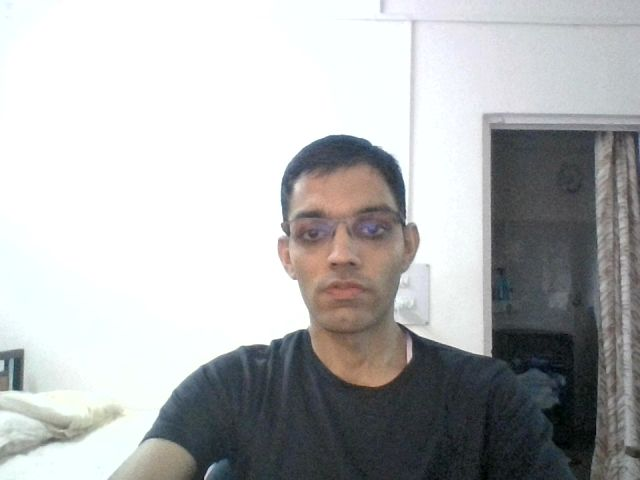

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
path = '/content/photo.jpg'
img = image.load_img(path, target_size=(255, 255), color_mode="grayscale" )
x = image.img_to_array(img)
x = x*(1/255)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
fn = path+(" "*(40-len(path)))
# Printing the result
print(fn +" "+probToClass(classes))

/content/photo.jpg                       sitting
